In [1]:
library(glmnet)
library(ggplot2)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



In [2]:
options(stringsAsFactors = FALSE)

In [3]:
base_dir <- "/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/feature_selection/"

In [4]:
load(paste0(base_dir, "cytokine_small_mol_all.RData"))

In [5]:
length(bootstraps)

[1] 1000

In [6]:
lambda_sequence <- bootstraps[[1]][["lambda"]]
genes <- rownames(coef(bootstraps[[1]], s = lambda_sequence[1]))

In [7]:
head(genes)

[1] "(Intercept)"  "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"  
[6] "MALAT1_HUMAN"

In [8]:
head(lambda_sequence)

[1] 0.5630120 0.5350366 0.5084513 0.4831870 0.4591781 0.4363621

In [9]:
genes <- genes[2:length(genes)]

In [10]:
head(genes)
length(genes)
num_genes <- length(genes)

[1] "TTN_HUMAN"    "AATF_HUMAN"   "NEXN_HUMAN"   "SOD2_HUMAN"   "MALAT1_HUMAN"
[6] "PIGP_HUMAN"

[1] 22187

In [11]:
nonzero_gene_count <- c()
lambda <- min(lambda_sequence)

genes_coeff <- coef(bootstraps[[1]], s = lambda)
genes_coeff <- genes_coeff[2:length(genes_coeff),]
gene_names <- names(genes_coeff)
genes_nonzero <- gene_names[abs(genes_coeff) > 0]
nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))

genes_intersect <- genes_nonzero

for (i in 2:length(bootstraps)) {
    lambda_seq <- bootstraps[[i]][["lambda"]]
    if (lambda < tail(lambda_seq, n = 1)) {
        print(i)
    } 
    genes_coeff <- coef(bootstraps[[i]], s = lambda)
    genes_coeff <- genes_coeff[2:length(genes_coeff),]
    gene_names <- names(genes_coeff)
    genes_nonzero <- gene_names[abs(genes_coeff) > 0]
    nonzero_gene_count <- c(nonzero_gene_count, length(genes_nonzero))
    genes_intersect <- intersect(genes_intersect, genes_nonzero)
}

### Non-zero genes in all rounds

In [12]:
print(length(genes_intersect))
genes_intersect

[1] 75


[1] "NLGN1_HUMAN"     "FAM155A_HUMAN"   "MYH6_HUMAN"      "PTPRD_HUMAN"    
 [5] "KCNIP4_HUMAN"    "SORCS1_HUMAN"    "GRIN2A_HUMAN"    "PTCHD4_HUMAN"   
 [9] "UACA_HUMAN"      "GPC6_HUMAN"      "CNTN5_HUMAN"     "GPRIN3_HUMAN"   
[13] "PEG10_HUMAN"     "ANGPT1_HUMAN"    "CDH11_HUMAN"     "COL4A2_HUMAN"   
[17] "KCNH7_HUMAN"     "SYT1_HUMAN"      "FN1_HUMAN"       "TENM3_HUMAN"    
[21] "TENM4_HUMAN"     "RBMS3_HUMAN"     "PPFIA2_HUMAN"    "PLCB4_HUMAN"    
[25] "LAMA4_HUMAN"     "LSAMP_HUMAN"     "SPHKAP_HUMAN"    "EGFEM1P_HUMAN"  
[29] "MAPK10_HUMAN"    "DLEU1_HUMAN"     "PDGFD_HUMAN"     "FAT3_HUMAN"     
[33] "HS6ST3_HUMAN"    "PPP1R9A_HUMAN"   "COL11A1_HUMAN"   "CREB5_HUMAN"    
[37] "RELN_HUMAN"      "CAPS2_HUMAN"     "MEF2C_HUMAN"     "L3MBTL4_HUMAN"  
[41] "BCAT1_HUMAN"     "LDHA_HUMAN"      "UNC5C_HUMAN"     "NREP_HUMAN"     
[45] "CASC9_HUMAN"     "DTNA_HUMAN"      "ANKRD44_HUMAN"   "HSPG2_HUMAN"    
[49] "RYR1_HUMAN"      "NR2F2-AS1_HUMAN" "ADAM23_HUMAN"    "SYNPO2_HUMAN"   
[53] "PLCXD3_HUMAN"    "DPYSL3_HUMAN"    "LAMA1_HUMAN"     "SGIP1_HUMAN"    
[57] "TBX20_HUMAN"     "SMARCA2_HUMAN"   "TRPM3_HUMAN"     "PPP1R13B_HUMAN" 
[61] "MTUS2_HUMAN"     "DPH6_HUMAN"      "PKNOX2_HUMAN"    "CKM_HUMAN"      
[65] "ILDR2_HUMAN"     "SOX6_HUMAN"      "NLGN4X_HUMAN"    "XDH_HUMAN"      
[69] "LENG8_HUMAN"     "PPP1R3A_HUMAN"   "PRRX1_HUMAN"     "PDZD2_HUMAN"    
[73] "DMGDH_HUMAN"     "FHL1_HUMAN"      "RNU4-2_HUMAN"

### Distribution of non-zero genes at min lambda

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


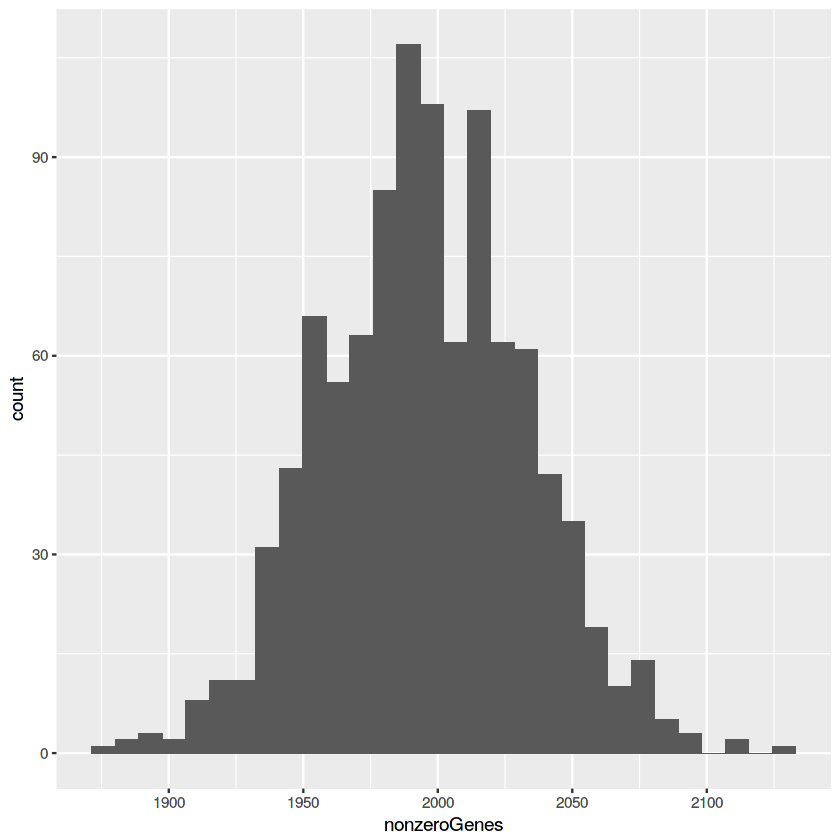

In [13]:
nonzero_gene_count <- as.data.frame(nonzero_gene_count)
colnames(nonzero_gene_count) <- "nonzeroGenes"
ggplot(nonzero_gene_count) + geom_histogram(aes(nonzeroGenes))

### Compare gene list to previous analysis (remove_1s2exp data)

In [14]:
remove_1st2exp_genes <- c('NLGN1_HUMAN','FAM155A_HUMAN','ARHGAP6_HUMAN','KCNIP4_HUMAN','SORCS1_HUMAN','ROBO2_HUMAN','GRIN2A_HUMAN','PDE3A_HUMAN','PTCHD4_HUMAN','UACA_HUMAN','GPC6_HUMAN','CMYA5_HUMAN','CNTN5_HUMAN','GPRIN3_HUMAN','TECRL_HUMAN','PEG10_HUMAN','ANGPT1_HUMAN','CDH11_HUMAN','COL4A2_HUMAN','KCNH7_HUMAN','TPM1_HUMAN','SYT1_HUMAN','PLEKHA7_HUMAN','FN1_HUMAN','TENM3_HUMAN','TENM4_HUMAN','RBMS3_HUMAN','RSPO3_HUMAN','AFF3_HUMAN','PLCB4_HUMAN','LSAMP_HUMAN','SPHKAP_HUMAN','AMOTL1_HUMAN','EGFEM1P_HUMAN','ANXA3_HUMAN','DLEU1_HUMAN','PDGFD_HUMAN','NFIB_HUMAN','HS6ST3_HUMAN','PPP1R9A_HUMAN','COL11A1_HUMAN','RELN_HUMAN','MEF2C_HUMAN','BCAT1_HUMAN','NRP2_HUMAN','LDHA_HUMAN','UNC5C_HUMAN','NREP_HUMAN','CASC9_HUMAN','ANKRD44_HUMAN','NR2F2-AS1_HUMAN','ADAM23_HUMAN','PLCXD3_HUMAN','DPYSL3_HUMAN','LAMA1_HUMAN','SGIP1_HUMAN','SMARCA2_HUMAN','PPP1R13B_HUMAN','MTUS2_HUMAN','PKNOX2_HUMAN','CKM_HUMAN','QRFPR_HUMAN','PPP1R14C_HUMAN','SOX6_HUMAN','XDH_HUMAN','LENG8_HUMAN','PPP1R3A_HUMAN','PRRX1_HUMAN','PDZD2_HUMAN','ANO4_HUMAN','GADL1_HUMAN','MYRFL_HUMAN','EEF1A1_HUMAN','FHL1_HUMAN','TCAP_HUMAN','RNU4-2_HUMAN')
x <- intersect(remove_1st2exp_genes, genes_intersect)
x
length(x)

[1] "NLGN1_HUMAN"     "FAM155A_HUMAN"   "KCNIP4_HUMAN"    "SORCS1_HUMAN"   
 [5] "GRIN2A_HUMAN"    "PTCHD4_HUMAN"    "UACA_HUMAN"      "GPC6_HUMAN"     
 [9] "CNTN5_HUMAN"     "GPRIN3_HUMAN"    "PEG10_HUMAN"     "ANGPT1_HUMAN"   
[13] "CDH11_HUMAN"     "COL4A2_HUMAN"    "KCNH7_HUMAN"     "SYT1_HUMAN"     
[17] "FN1_HUMAN"       "TENM3_HUMAN"     "TENM4_HUMAN"     "RBMS3_HUMAN"    
[21] "PLCB4_HUMAN"     "LSAMP_HUMAN"     "SPHKAP_HUMAN"    "EGFEM1P_HUMAN"  
[25] "DLEU1_HUMAN"     "PDGFD_HUMAN"     "HS6ST3_HUMAN"    "PPP1R9A_HUMAN"  
[29] "COL11A1_HUMAN"   "RELN_HUMAN"      "MEF2C_HUMAN"     "BCAT1_HUMAN"    
[33] "LDHA_HUMAN"      "UNC5C_HUMAN"     "NREP_HUMAN"      "CASC9_HUMAN"    
[37] "ANKRD44_HUMAN"   "NR2F2-AS1_HUMAN" "ADAM23_HUMAN"    "PLCXD3_HUMAN"   
[41] "DPYSL3_HUMAN"    "LAMA1_HUMAN"     "SGIP1_HUMAN"     "SMARCA2_HUMAN"  
[45] "PPP1R13B_HUMAN"  "MTUS2_HUMAN"     "PKNOX2_HUMAN"    "CKM_HUMAN"      
[49] "SOX6_HUMAN"      "XDH_HUMAN"       "LENG8_HUMAN"     "PPP1R3A_HUMAN"  
[53] "PRRX1_HUMAN"     "PDZD2_HUMAN"     "FHL1_HUMAN"      "RNU4-2_HUMAN"

[1] 56

56 genes are found in both (all cell analysis including non-cardios vs. remove1st2exp w/ TNNT2 == 0 cells filtered out)

### Caclulate fold changes for genes

In [15]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [16]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_normalized_counts.RData")

In [17]:
cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/train_cm_filtered_cells_entrez_only_metadata.csv")

In [18]:
head(cell_metadata)

X,nGene,nUMI,orig.ident,day,protocol,cell_line,diff_harvest,passage,scientist,diff_exp,sci_exp,ctnt,cell_sample
AAACATCGAAACATCG_14_6,1577,2986,SeuratProject,D12,Lian,AICS11,08_8_2017,44,KG,7_24_2017,KG_7_24,90,15
AAACATCGAAACATCG_21_10,578,727,SeuratProject,D14,Murry,AICS0,08_11_2017,28,KG,7_27_2017,KG_7_27,78,22
AAACATCGAACAACCA_2_9,489,606,SeuratProject,D12,Lian,AICS37,07_24_2017,34,AN,7_10_2017,AN_7_10,89,3
AAACATCGAACAACCA_5_8,1117,1511,SeuratProject,D14,Murry,AICS0,07_28_2017,32,AN,7_13_2017,AN_7_13,75,6
AAACATCGAACGCTTA_32_8,940,1599,SeuratProject,D24,Lian,AICS11,08_18_2017,44,KG,7_24_2017,KG_7_24,92,33
AAACATCGAACTCACC_26_2,2282,4392,SeuratProject,D12,Lian,AICS37,08_11_2017,37,KG,7_27_2017,KG_7_27,87,27


In [19]:
cardioAICS <- t(cardioAICS)

diff_protocol <- cell_metadata$protocol

names(diff_protocol) <- cell_metadata$X

In [20]:
genes.use <- genes_intersect

cytokine_cells <- cell_metadata$X[cell_metadata$protocol == "Murry"]
small_mol_cells <- cell_metadata$X[cell_metadata$protocol == "Lian"]

cytokine_exp_mat <- cardioAICS[cytokine_cells,]
small_mol_exp_mat <- cardioAICS[small_mol_cells,]

foldChange_list <- list()
for (i in 1:length(genes.use)) {
    gene <- genes.use[i]
    cytokine_exp <- cytokine_exp_mat[,gene]
    small_mol_exp <- small_mol_exp_mat[,gene]
    log2fc <- log2(mean(expm1(small_mol_exp)) + 1) - log2(mean(expm1(cytokine_exp)) + 1)
    foldChange_list[[gene]] <- log2fc
    
}

lfc_df <- data.frame("log2fc" = as.numeric(foldChange_list), "gene" = names(foldChange_list), row.names = names(foldChange_list))
lfc_df <- dplyr::arrange(lfc_df, log2fc)

In [21]:
lfc_df

log2fc,gene
-2.8032157,CNTN5_HUMAN
-1.1986557,SPHKAP_HUMAN
-0.9503390,EGFEM1P_HUMAN
-0.8618753,PDGFD_HUMAN
-0.8310133,L3MBTL4_HUMAN
-0.8189935,SORCS1_HUMAN
-0.7896815,KCNH7_HUMAN
-0.7875974,SYNPO2_HUMAN
-0.7056918,PLCXD3_HUMAN
-0.6589798,UNC5C_HUMAN


### Fit using 75 genes

In [23]:
diff_protocol <- as.factor(diff_protocol)

In [25]:
library(boot)

In [26]:
subset_cardio <- cardioAICS[,genes.use]
subset_cardio <- as.data.frame(as.matrix(subset_cardio))

In [28]:
fit <- glm(diff_protocol ~ .,
    data = subset_cardio, family = binomial("logit")
   )

In [29]:
fit


Call:  glm(formula = diff_protocol ~ ., family = binomial("logit"), 
    data = subset_cardio)

Coefficients:
      (Intercept)        NLGN1_HUMAN      FAM155A_HUMAN         MYH6_HUMAN  
          -0.2146            -0.3141             0.2768             0.1608  
      PTPRD_HUMAN       KCNIP4_HUMAN       SORCS1_HUMAN       GRIN2A_HUMAN  
           0.2144            -0.3372             0.2901            -0.3493  
     PTCHD4_HUMAN         UACA_HUMAN         GPC6_HUMAN        CNTN5_HUMAN  
          -0.4965             0.2404            -0.1586             0.4946  
     GPRIN3_HUMAN        PEG10_HUMAN       ANGPT1_HUMAN        CDH11_HUMAN  
           0.1415             0.1729            -0.2453             0.2381  
     COL4A2_HUMAN        KCNH7_HUMAN         SYT1_HUMAN          FN1_HUMAN  
          -0.2071             0.1416            -0.4826            -0.0494  
      TENM3_HUMAN        TENM4_HUMAN        RBMS3_HUMAN       PPFIA2_HUMAN  
          -0.3063            -0.3180      

In [30]:
subset_cardio$diff_protocol <- diff_protocol

In [31]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)
cv.test <- cv.glm(subset_cardio, cost = cost, fit, K = 5)

In [32]:
cv.test$delta

[1] 0.1014204 0.1011735

In [33]:
load("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_normalized_counts.RData")
holdout_cell_metadata <- read.csv("/allen/aics/gene-editing/RNA_seq/scRNAseq_SeeligCollaboration/12012017_cardio/seurat/all_cells/regressions/reg1/holdout_cm_filtered_cells_entrez_only_metadata.csv")

In [34]:
holdout_cardioAICS <- t(holdout_cardioAICS)

diff_protocol <- holdout_cell_metadata$protocol

names(diff_protocol) <- holdout_cell_metadata$X

In [36]:
holdout_mat <- holdout_cardioAICS[,genes.use]
holdout_mat <- as.data.frame(as.matrix(holdout_mat))

In [38]:
dim(holdout_mat)

[1] 1642   75

In [39]:
holdout_predict <- predict(fit, newdata = holdout_mat, type = c("response"))

In [42]:
get_predicted_time <- function(predict_prob) {
    if (predict_prob < 0.5) {
        return("Lian")
    } else {
        return("Murry")
    }
}

In [43]:
predicted_day <- sapply(holdout_predict, get_predicted_time, simplify = TRUE)

In [45]:
predict_actual_df <- data.frame("predicted" = predicted_day, "actual" = diff_protocol)
xtabs(~ predicted + actual, data = predict_actual_df)

         actual
predicted Lian Murry
    Lian   697    90
    Murry  104   751